# 03_Machine Learning_[Titanic실습]


In [151]:
# 워닝옵션 제거

import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. 탐색적 데이터 분석

### (1) 데이터 로드 및 확인

In [2]:
titanic_df = pd.read_csv('./실습데이터/titanic_train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### (2) 데이터 정보 확인

In [3]:
# 기본정보
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 결측치확인
titanic_df.isna().apply(sum)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

### (3) missingno 패키지를 이용한 결측값을 가지는 컬럼 확인 및 처리
   - age는 평균으로, cabin 'N', embarked 'N' 으로 대체

In [6]:
# 결측치확인
titanic_df.isna().apply(sum)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

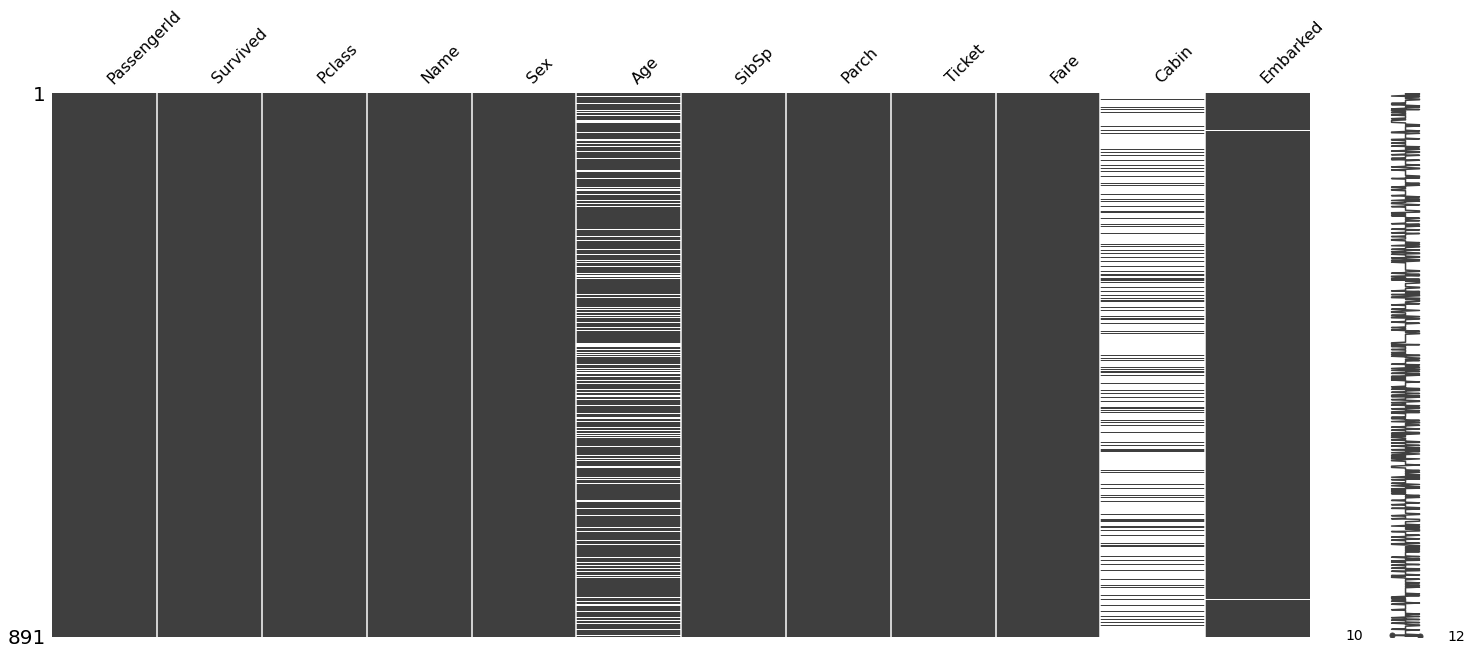

In [7]:
import missingno as msno

msno.matrix(titanic_df)

#### 1) Age의 결측치를 대체하기 위한 분석

In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

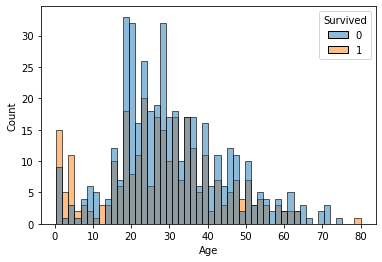

In [9]:
sns.histplot(x = 'Age', hue = 'Survived', data = titanic_df, bins=50)

   - 5세이하
       - 살아남은 사람의 비율이 높다
   - 10대중반 ~ 20대중반
       - 죽은 사람의 비율이 높다
   - 대체로 0~5세까지는 생존률이 높다
   - 하지만 5세가 넘어가면 10대후반~30대초반의 생존률이 가장 높다
   - 반대로 죽은사람도 10대후반 ~ 30대초반이 가장많다.
   
##### 나이에 따라 생존율이 다르기 때문에 결측치를 제외하거나 일원화된 값으로 대체해서는 안될거 같다
##### 뭘로 대체하지??

##### 이름의 Mr / Mrs / Miss / Master / Dr 의 평균값을 대입하자
   - 내가 생각한 최선의 방법.. ㅠ
  

In [10]:
titanic_df['Miss'] = titanic_df['Name'].str.split().map(lambda x : 'Miss.' in x)
titanic_df['Mrs'] = titanic_df['Name'].str.split().map(lambda x : 'Mrs.' in x)
titanic_df['Mr'] = titanic_df['Name'].str.split().map(lambda x : 'Mr.' in x)
titanic_df['Master'] = titanic_df['Name'].str.split().map(lambda x : 'Master.' in x)
titanic_df['Dr'] = titanic_df['Name'].str.split().map(lambda x : 'Dr.' in x)

In [11]:
null_age = titanic_df[ titanic_df['Age'].isnull() ]
age_null_miss_index = null_age[ null_age['Miss'] == 1 ].index
titanic_df.loc[ age_null_miss_index, 'Age'] = titanic_df.loc[titanic_df['Miss'] == 1, 'Age' ].mean()

In [12]:
null_age = titanic_df[ titanic_df['Age'].isnull() ]
age_null_miss_index = null_age[ null_age['Mrs'] == 1 ].index
titanic_df.loc[ age_null_miss_index, 'Age'] = titanic_df.loc[titanic_df['Mrs'] == 1, 'Age' ].mean()

In [13]:
null_age = titanic_df[ titanic_df['Age'].isnull() ]
age_null_miss_index = null_age[ null_age['Mr'] == 1 ].index
titanic_df.loc[ age_null_miss_index, 'Age'] = titanic_df.loc[titanic_df['Mr'] == 1, 'Age' ].mean()

In [14]:
null_age = titanic_df[ titanic_df['Age'].isnull() ]
age_null_miss_index = null_age[ null_age['Master'] == 1 ].index
titanic_df.loc[ age_null_miss_index, 'Age'] = titanic_df.loc[titanic_df['Master'] == 1, 'Age' ].mean()

In [15]:
null_age = titanic_df[ titanic_df['Age'].isnull() ]
age_null_miss_index = null_age[ null_age['Dr'] == 1 ].index
titanic_df.loc[ age_null_miss_index, 'Age'] = titanic_df.loc[titanic_df['Dr'] == 1, 'Age' ].mean()

#### 2) `Embarked` 결측치처리

In [17]:
titanic_df['Embarked'].value_counts()
titanic_df.loc[ titanic_df['Embarked'].isnull(), 'Embarked'] = 'N'

#### 3) Cabin 결측치처리

In [19]:
titanic_df['Cabin'].value_counts()
titanic_df.loc[ titanic_df['Cabin'].isnull(), 'Cabin'] = 'N'

<AxesSubplot:>

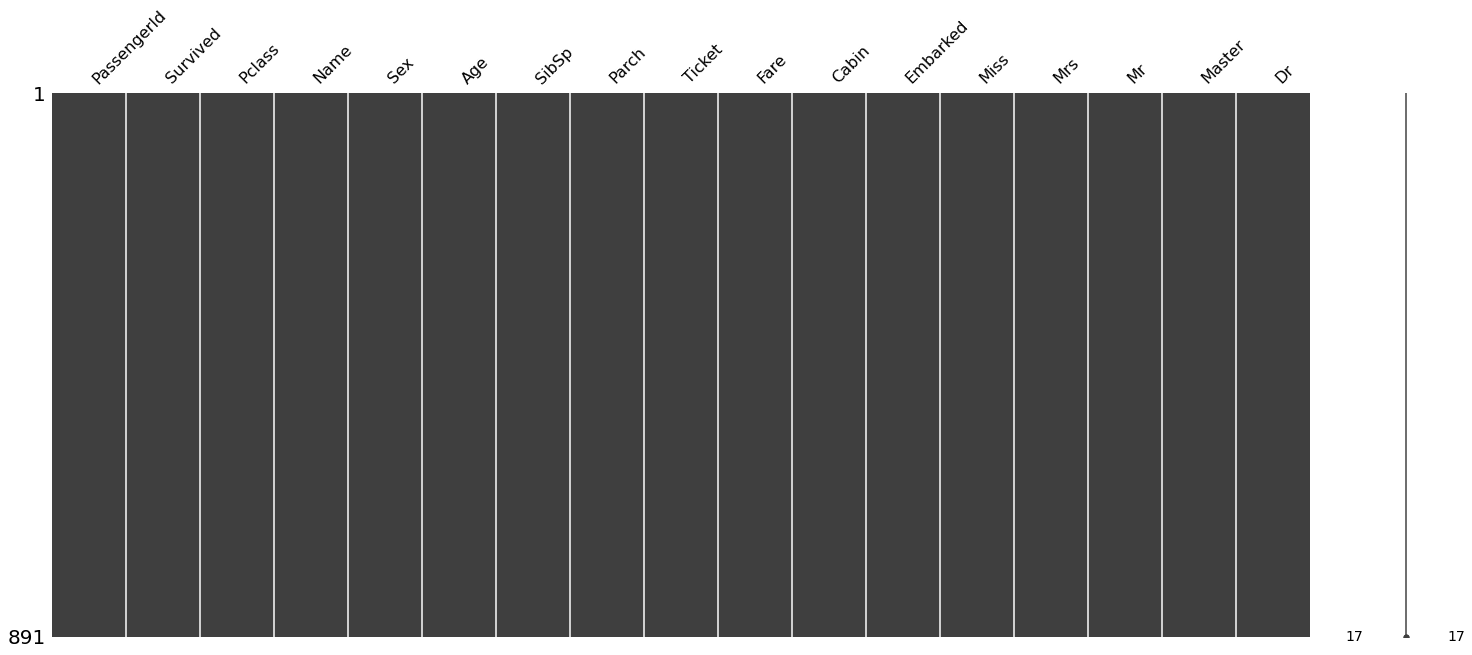

In [20]:
msno.matrix(titanic_df)
# 결측치 대체 완료~

### (4) age , cabin , embarked 빈도확인

#### 1) Age 빈도확인

<AxesSubplot:xlabel='Age', ylabel='Density'>

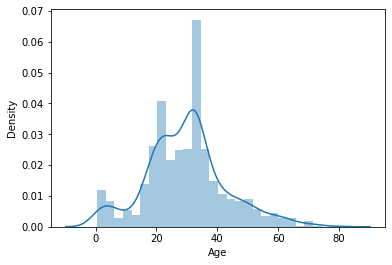

In [26]:
sns.distplot(titanic_df['Age'])

<AxesSubplot:ylabel='Frequency'>

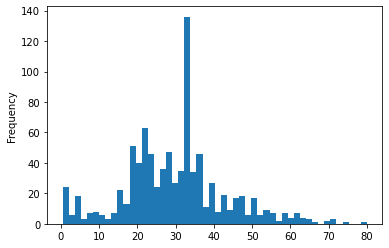

In [28]:
titanic_df['Age'].plot(kind='hist', bins=50)

##### 2) Cabin 빈도확인

In [30]:
titanic_df['Cabin'].value_counts()

N              687
G6               4
C23 C25 C27      4
B96 B98          4
E101             3
              ... 
E63              1
C103             1
C91              1
C128             1
D28              1
Name: Cabin, Length: 148, dtype: int64

##### 3) Embarked 빈도확인

<AxesSubplot:>

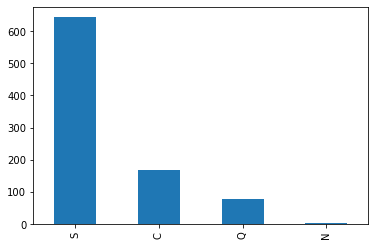

In [35]:
titanic_df['Embarked'].value_counts().plot.bar()

### (5) 성별에 따른 생존여부 확인 및 barplot를 이용한 시각화
 - 수업시간에 배운 시각화를 이용하여 다양한 정보를 탐색하세요

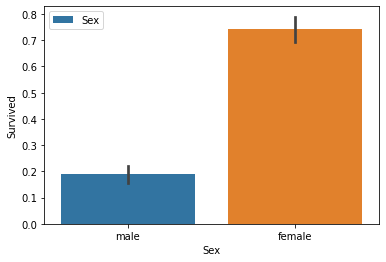

In [43]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

### (6) age , sex, cabin , embarked 에 대한 라벨인코딩

In [125]:
from sklearn.preprocessing import LabelEncoder

titanic_df['Age'] = (titanic_df['Age'] // 10) * 10

label_encoder = LabelEncoder()
label_encoder.fit(titanic_df['Sex'])
titanic_df['Sex'] = label_encoder.transform(titanic_df['Sex'])

label_encoder = LabelEncoder()
label_encoder.fit(titanic_df['Cabin'])
titanic_df['Cabin'] = label_encoder.transform(titanic_df['Cabin'])

label_encoder = LabelEncoder()
label_encoder.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = label_encoder.transform(titanic_df['Embarked'])

In [126]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Miss,Mrs,Mr,Master,Dr
0,1,0,3,"Braund, Mr. Owen Harris",1,20.0,1,0,A/5 21171,7.2500,146,3,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,30.0,1,0,PC 17599,71.2833,81,0,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,20.0,0,0,STON/O2. 3101282,7.9250,146,3,True,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,30.0,1,0,113803,53.1000,55,3,False,True,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,30.0,0,0,373450,8.0500,146,3,False,False,True,False,False


### 2. Machine Learning 적용

### (1) 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출

In [127]:
use_feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin']
use_target = ['Survived']

In [128]:
feature = np.array(titanic_df[use_feature])
target = np.array(titanic_df[use_target]) 

### (2) 80:20 으로 데이터 분리(train_test_split)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train, x_test, y_train, y_test = train_test_split(feature, target)

### (3) 의사결정트리를 이용한 학습, 예측 및 정확도 확인

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [132]:
model = DecisionTreeClassifier(random_state=123)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.7668161434977578

### (4) KFold=5 를 이용한 교차검증 및 평균정확도 확인

In [133]:
from sklearn.model_selection import StratifiedKFold

In [134]:
kfold = StratifiedKFold(n_splits=5)


model = DecisionTreeClassifier(random_state=123)
all_accuracy = []
for train_idx, test_idx in kfold.split(feature, target):
    x_train = feature[train_idx]
    y_train = target[train_idx]
    
    x_test = feature[test_idx]
    y_test = target[test_idx]
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    all_accuracy.append(accuracy)

In [135]:
all_accuracy

[0.776536312849162,
 0.8033707865168539,
 0.8258426966292135,
 0.7471910112359551,
 0.8258426966292135]

### (5) GridSearchCV 를 이용한 교차검증 및 평균정확도 확인
 - 하이퍼 파라미터 적용해보기

##### 1) DecisionTreeClassifier()

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:



model = DecisionTreeClassifier(random_state=123)

params = {
    'criterion'         : ['gini', 'entropy'],
    'splitter'          : ['random', 'best'],
    'max_depth'         : [7, 9, 11],
    'min_samples_split' : [2, 4, 6]
}

grid_model = GridSearchCV(model, param_grid = params, cv=5)

grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['random', 'best']})

In [138]:
temp_df = pd.DataFrame(grid_model.cv_results_)
result = temp_df[ ['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'] ]

In [139]:
result.sort_values(by='mean_test_score', ascending=False).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
11,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.814863,1,0.804196,0.769231,0.874126,0.830986,0.795775
7,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.814813,2,0.811189,0.783217,0.888112,0.788732,0.802817
9,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.813444,3,0.811189,0.769231,0.874126,0.802817,0.809859
25,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.813405,4,0.818182,0.783217,0.881119,0.774648,0.809859
5,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.812046,5,0.783217,0.790210,0.874126,0.795775,0.816901


In [141]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 6, 'splitter': 'best'}
0.8148626021865459


##### 2) LightGbm()

In [144]:
from lightgbm import LGBMClassifier

In [164]:
model = LGBMClassifier()


params = {
    'learning_rate' : [0.1, 0.2],
    'num_iterations' :  [100, 150],
    'max_depth' : [16, 14]
}

grid_model = GridSearchCV(model, param_grid = params, cv=5)
grid_model.fit(x_train, y_train)
# {'learning_rate': 0.1, 'max_depth': 16, 'num_iterations': 100}

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [16, 14],
                         'num_iterations': [100, 150]})

In [165]:
temp_df = pd.DataFrame(grid_model.cv_results_)
result = temp_df[ ['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score'] ]
result.sort_values(by='mean_test_score', ascending=False).head()

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'learning_rate': 0.1, 'max_depth': 16, 'num_i...",0.841525,1,0.811189,0.804196,0.902098,0.859155,0.830986
2,"{'learning_rate': 0.1, 'max_depth': 14, 'num_i...",0.837339,2,0.797203,0.797203,0.895105,0.866197,0.830986
1,"{'learning_rate': 0.1, 'max_depth': 16, 'num_i...",0.834512,3,0.797203,0.797203,0.902098,0.852113,0.823944
3,"{'learning_rate': 0.1, 'max_depth': 14, 'num_i...",0.826111,4,0.790210,0.783217,0.888112,0.845070,0.823944
4,"{'learning_rate': 0.2, 'max_depth': 16, 'num_i...",0.824633,5,0.804196,0.797203,0.909091,0.830986,0.781690


In [166]:
print(grid_model.best_params_)
print(grid_model.best_score_)

{'learning_rate': 0.1, 'max_depth': 16, 'num_iterations': 100}
0.841524672510588
